<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Test%20Code/ANN_VibrationTest01_07072020(1000epochs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [117]:
Vibration01 = pd.read_csv('VibrationTest01.csv',',')
# Ref: https://mc.ai/an-introduction-on-time-series-forecasting-with-simple-neura-networks-lstm/

In [118]:
Vibration01.head()

,Date,Hz,X,Y,Z
0,19/6/2020 09:10:45,0.00,0.000,0.000,0.001
1,19/6/2020 09:10:46,3.24,0.000,0.000,0.002
2,19/6/2020 09:10:47,6.48,0.001,0.001,0.002
3,19/6/2020 09:10:48,9.73,0.001,0.001,0.002
4,19/6/2020 09:10:49,12.97,0.001,0.001,0.002


In [119]:
Ydata = pd.DataFrame(Vibration01, columns=['Date', 'Y'])
Ydata['Date'] = pd.to_datetime(Ydata['Date'])
ind_Ydata = Ydata.set_index(['Date'], drop=True)
ind_Ydata.head()

,Y
Date,
2020-06-19 09:10:45,0.000
2020-06-19 09:10:46,0.000
2020-06-19 09:10:47,0.001
2020-06-19 09:10:48,0.001
2020-06-19 09:10:49,0.001


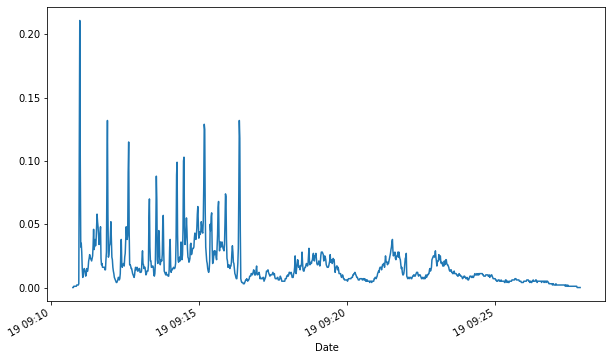

In [120]:
ind_Ydata = ind_Ydata.sort_index()
plt.figure(figsize=(10, 6))
ind_Ydata['Y'].plot()

In [121]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(-1, 1))
ind_Ydata_re = scaler.fit_transform(ind_Ydata)
ind_Ydata_re
ind_Ydata['Y'] = ind_Ydata_re
ind_Ydata

,Y
Date,
2020-06-19 09:10:45,-1.000000
2020-06-19 09:10:46,-1.000000
2020-06-19 09:10:47,-0.990521
2020-06-19 09:10:48,-0.990521
2020-06-19 09:10:49,-0.990521
...,...
2020-06-19 09:27:48,-1.000000
2020-06-19 09:27:49,-1.000000
2020-06-19 09:27:50,-1.000000


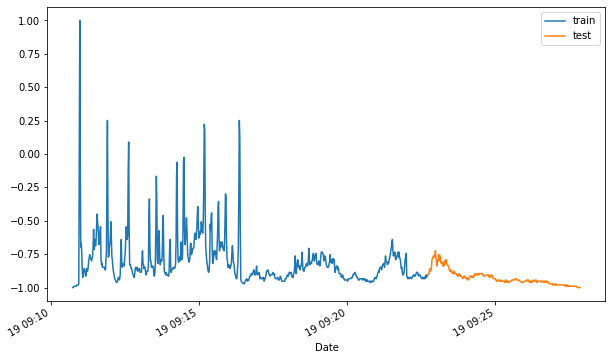

In [122]:
split_date = pd.Timestamp('2020-06-19 09:22:43')
df =  ind_Ydata['Y']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [123]:
X_train = train[:-1]
y_train = train[1:]
X_test = test[:-1]
y_test = test[1:]

In [124]:
X_train

Date
2020-06-19 09:10:45   -1.000000
2020-06-19 09:10:46   -1.000000
2020-06-19 09:10:47   -0.990521
2020-06-19 09:10:48   -0.990521
2020-06-19 09:10:49   -0.990521
                         ...   
2020-06-19 09:22:38   -0.933649
2020-06-19 09:22:39   -0.914692
2020-06-19 09:22:40   -0.905213
2020-06-19 09:22:41   -0.924171
2020-06-19 09:22:42   -0.914692
Name: Y, Length: 714, dtype: float64

In [125]:
y_train

Date
2020-06-19 09:10:46   -1.000000
2020-06-19 09:10:47   -0.990521
2020-06-19 09:10:48   -0.990521
2020-06-19 09:10:49   -0.990521
2020-06-19 09:10:50   -0.990521
                         ...   
2020-06-19 09:22:39   -0.914692
2020-06-19 09:22:40   -0.905213
2020-06-19 09:22:41   -0.924171
2020-06-19 09:22:42   -0.914692
2020-06-19 09:22:43   -0.905213
Name: Y, Length: 714, dtype: float64

In [126]:
X_test

Date
2020-06-19 09:22:43   -0.905213
2020-06-19 09:22:44   -0.905213
2020-06-19 09:22:45   -0.895735
2020-06-19 09:22:46   -0.895735
2020-06-19 09:22:47   -0.867299
                         ...   
2020-06-19 09:27:47   -1.000000
2020-06-19 09:27:48   -1.000000
2020-06-19 09:27:49   -1.000000
2020-06-19 09:27:50   -1.000000
2020-06-19 09:27:51   -1.000000
Name: Y, Length: 308, dtype: float64

In [127]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='sigmoid'))
nn_model.add(Dense(1))

start = time.time()
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=1000, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)
end = time.time()
running_time = end-start
print('time cost : %.5f sec' %running_time)

Epoch 1/1000
714/714 [==============================] - 1s 991us/step - loss: 0.0406
Epoch 2/1000
714/714 [==============================] - 1s 850us/step - loss: 0.0252
Epoch 3/1000
714/714 [==============================] - 1s 990us/step - loss: 0.0218
Epoch 4/1000
714/714 [==============================] - 1s 955us/step - loss: 0.0193
Epoch 5/1000
714/714 [==============================] - 1s 892us/step - loss: 0.0174
Epoch 6/1000
714/714 [==============================] - 1s 887us/step - loss: 0.0161
Epoch 7/1000
714/714 [==============================] - 1s 881us/step - loss: 0.0153
Epoch 8/1000
714/714 [==============================] - 1s 883us/step - loss: 0.0147
Epoch 9/1000
714/714 [==============================] - 1s 885us/step - loss: 0.0144
Epoch 10/1000
714/714 [==============================] - 1s 894us/step - loss: 0.0142
Epoch 11/1000
714/714 [==============================] - 1s 856us/step - loss: 0.0140
Epoch 12/1000
714/714 [==============================] - 1s 895

In [128]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.644
The R2 score on the Test set is:	0.951


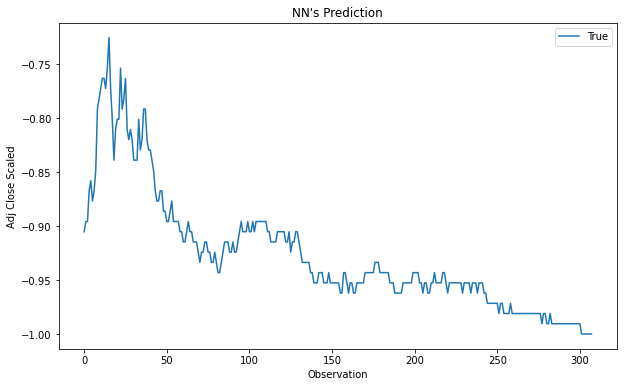

In [129]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True')
# plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show()

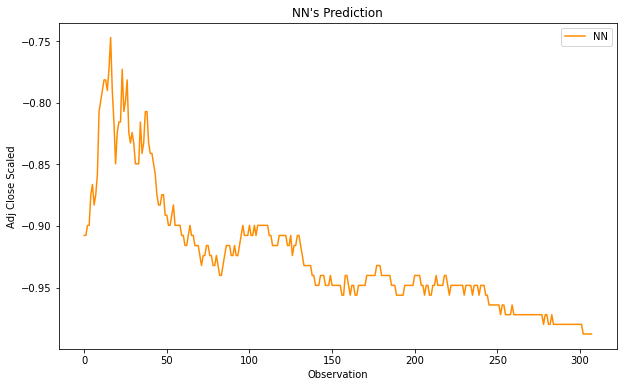

In [130]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test.values, label='True')
plt.plot(y_pred_test_nn, 'darkorange', label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show()

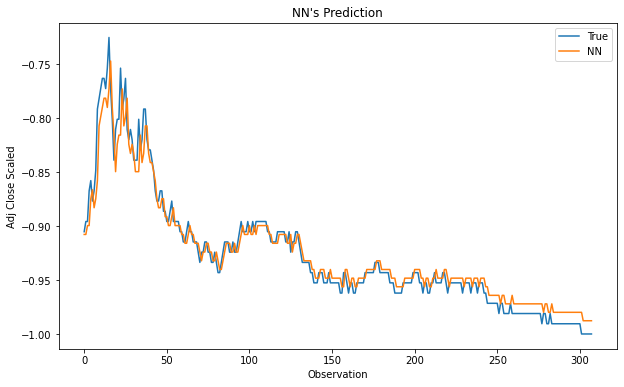

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show()

In [132]:
ypredict = pd.DataFrame(Vibration01[715:], columns=['Date', 'Y'])
ypredict['Y']= y_pred_test_nn
ypredict.head()

,Date,Y
715,19/6/2020 09:22:44,-0.907736
716,19/6/2020 09:22:45,-0.907736
717,19/6/2020 09:22:46,-0.899519
718,19/6/2020 09:22:47,-0.899519
719,19/6/2020 09:22:48,-0.874664


In [133]:
ypredict['Date'] = pd.to_datetime(ypredict['Date'])
ind_ypredict = ypredict.set_index(['Date'], drop=True)
ind_ypredict.head()

,Y
Date,
2020-06-19 09:22:44,-0.907736
2020-06-19 09:22:45,-0.907736
2020-06-19 09:22:46,-0.899519
2020-06-19 09:22:47,-0.899519
2020-06-19 09:22:48,-0.874664


In [137]:
y_test

Date
2020-06-19 09:22:44   -0.905213
2020-06-19 09:22:45   -0.895735
2020-06-19 09:22:46   -0.895735
2020-06-19 09:22:47   -0.867299
2020-06-19 09:22:48   -0.857820
                         ...   
2020-06-19 09:27:48   -1.000000
2020-06-19 09:27:49   -1.000000
2020-06-19 09:27:50   -1.000000
2020-06-19 09:27:51   -1.000000
2020-06-19 09:27:52   -1.000000
Name: Y, Length: 308, dtype: float64

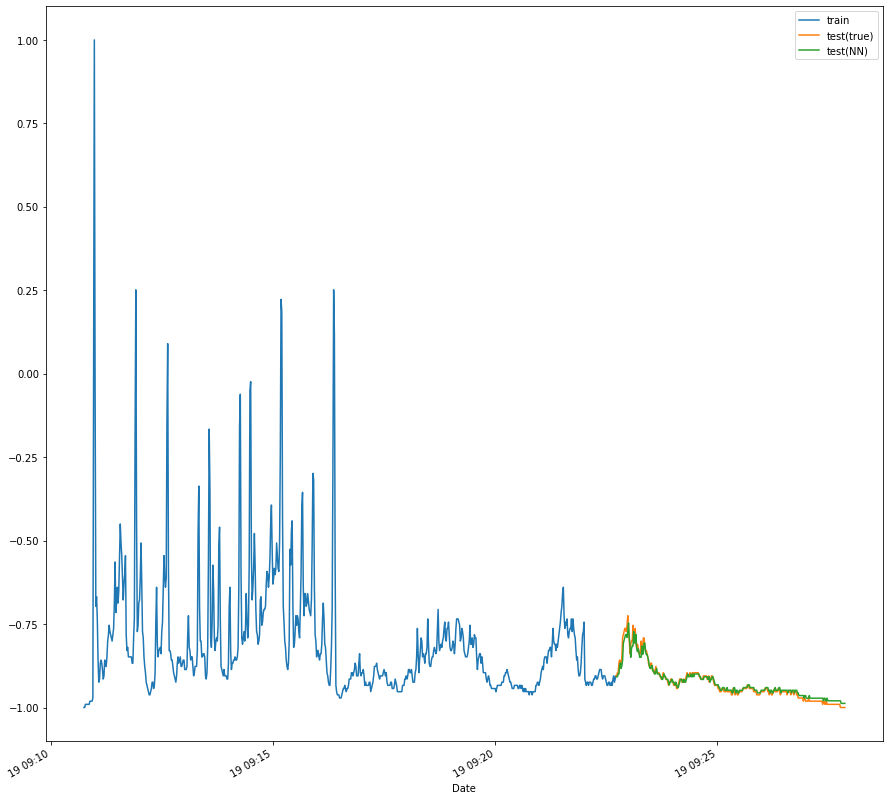

In [135]:
plt.figure(figsize=(15, 15))
ax = train.plot()
test.plot(ax=ax)
ind_ypredict.plot(ax=ax)
plt.legend(['train', 'test(true)','test(NN)'])


Text(0.5, 0, 'Date')

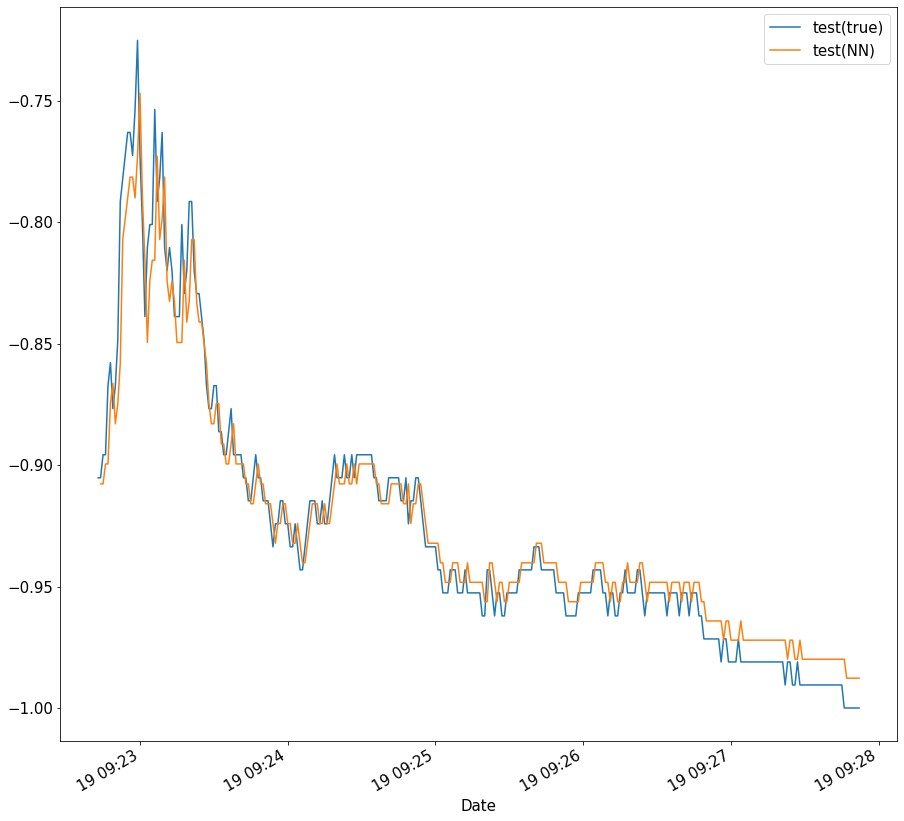

In [136]:
plt.figure(figsize=(15, 15))
ax = test.plot(fontsize=15)
ind_ypredict.plot(ax=ax, fontsize=15)
plt.legend(['test(true)','test(NN)'], fontsize=15)
plt.xlabel('Date', fontsize=15)

# import matplotlib.pyplot as plt
# # 
# ax = plt.subplot(111)
# # 
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # 
# ax.xlabel(..., fontsize=20)
# ax.ylabel(..., fontsize=20)
# # 
# ax.legend(..., fontsize=20)